In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Minute,Night,Holiday,Block,lat,long,Category,...,StreetType-INT,StreetType-WY,StreetType-TR,StreetType-PZ,StreetType-CR,StreetType-RD,Season-Spring,Season-Summer,Season-Winter,Season-Fall
0,29,11,0,17,1,0,0,0.584478,-1.557336,OTHER OFFENSES,...,1,0,0,0,0,0,0,0,0,1
1,1,6,8,0,0,0,1,0.911468,0.775401,OTHER OFFENSES,...,0,0,0,0,0,0,0,1,0,0
2,27,4,6,29,0,0,1,-2.045603,0.570183,OTHER OFFENSES,...,0,0,0,0,0,0,1,0,0,0
3,1,4,15,49,0,0,32,1.510611,-0.150875,ASSAULT,...,0,0,0,0,0,0,1,0,0,0
4,25,7,16,19,0,0,0,0.718501,0.532851,ASSAULT,...,1,0,0,0,0,0,0,1,0,0


In [3]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


### Create and train the Decision Tree 

In [4]:
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X, y)

DecisionTreeClassifier()

### Test the model

In [6]:
# Make predictions
y_pred = clf.predict(x_test)

### Evaluation

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2371505039576334


In [8]:
y_pred_proba = clf.predict_proba(x_test)

In [9]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=clf.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 26.68399768010108


In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)

<Axes: xlabel='Predicted', ylabel='Actual'>

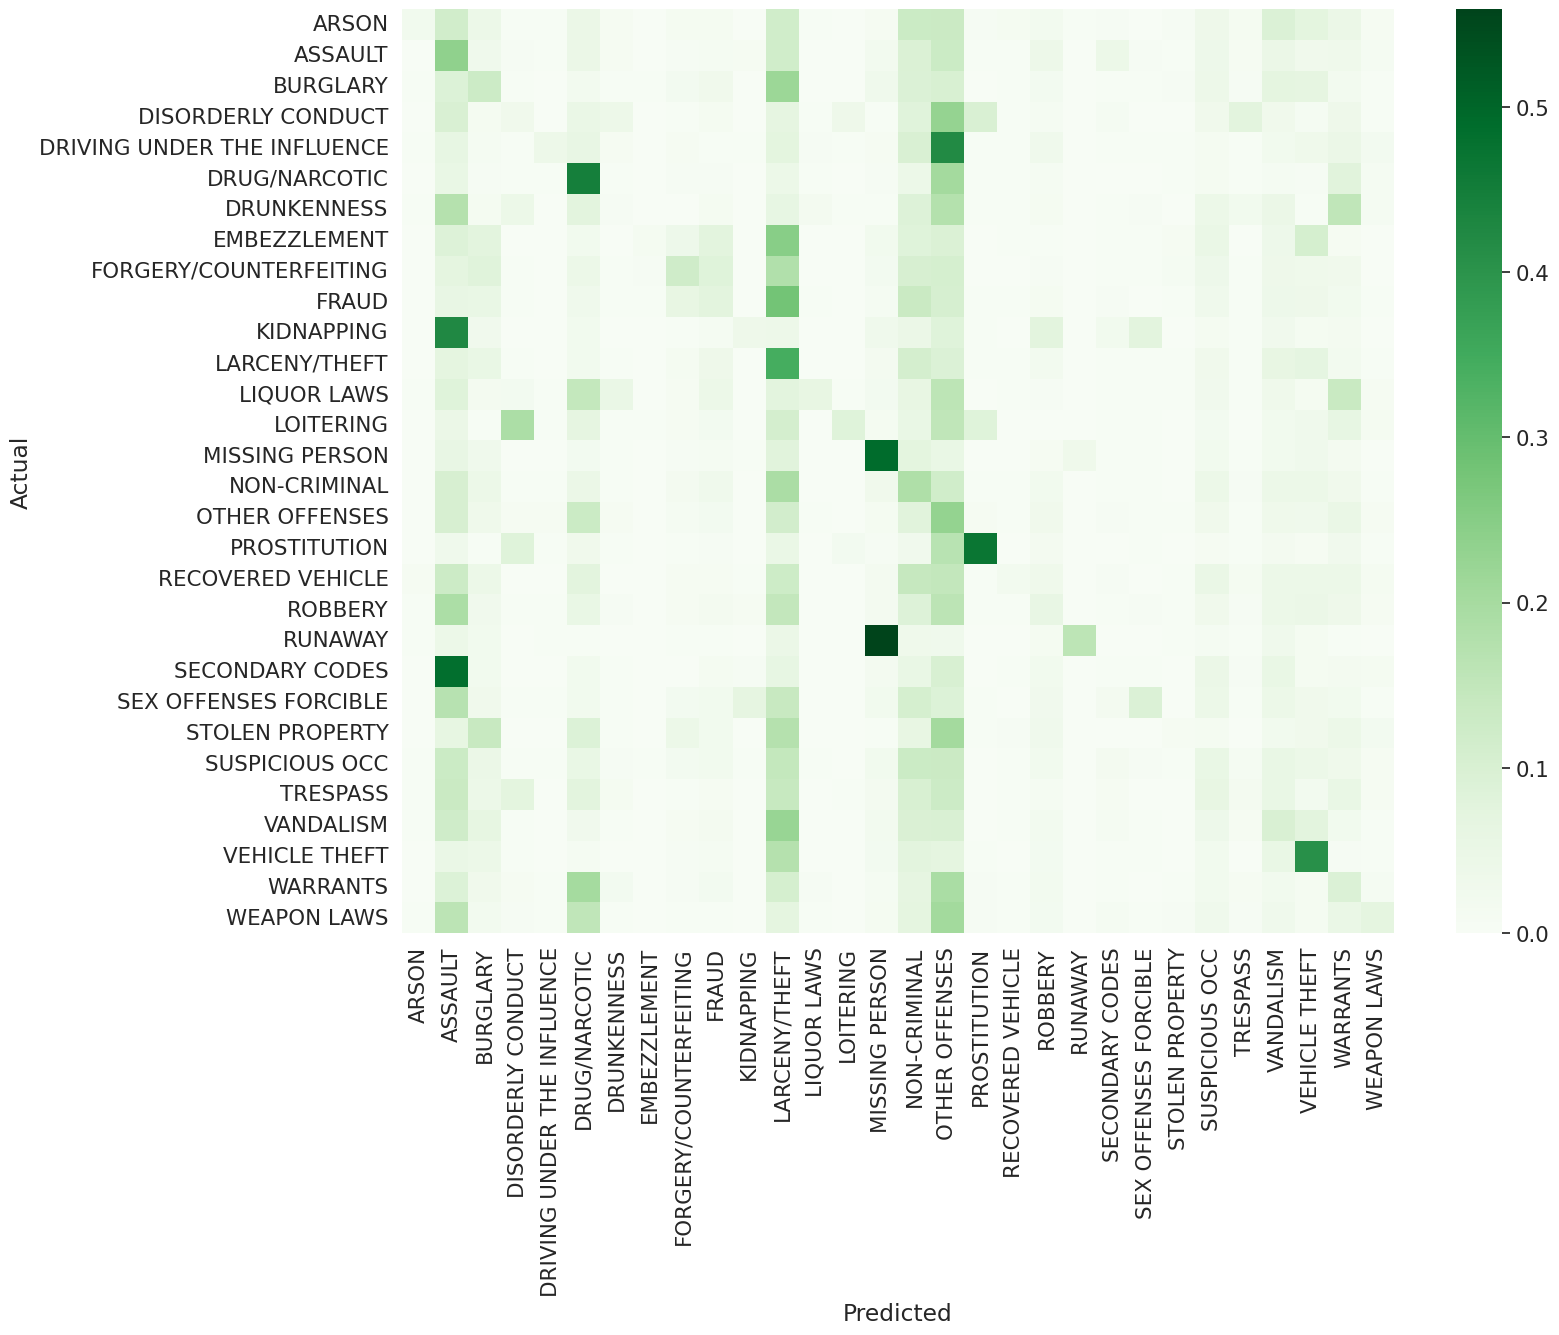

In [11]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Greens", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [12]:
# Save the model
joblib.dump(clf, 'models/decision_tree/decision_tree.pkl')

['models/decision_tree/decision_tree.pkl']